<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from pylab import subplot
%matplotlib inline

In [19]:
raw_movie_data = pd.read_csv("movies.dat",delimiter="::",names = ["MovieID", "Title", "Genres"])

C:\Users\C740129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [20]:
raw_user_data = pd.read_csv("users.dat",delimiter="::",names = ["UserID", "Gender", "Age", "Occupation","Zip-code"])


C:\Users\C740129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [21]:
raw_rating_data = pd.read_csv("ratings.dat",delimiter="::",names = ["UserID", "MovieID", "Rating", "Timestamp"])


C:\Users\C740129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [22]:
#Data Wrangling 
movie_rating_data = pd.merge(raw_movie_data,raw_rating_data,on='MovieID', how='outer')


In [23]:
print("--------movie_rating_data----------")
print(movie_rating_data.head())


--------movie_rating_data----------
   MovieID             Title                       Genres  UserID  Rating  \
0        1  Toy Story (1995)  Animation|Children's|Comedy     1.0     5.0   
1        1  Toy Story (1995)  Animation|Children's|Comedy     6.0     4.0   
2        1  Toy Story (1995)  Animation|Children's|Comedy     8.0     4.0   
3        1  Toy Story (1995)  Animation|Children's|Comedy     9.0     5.0   
4        1  Toy Story (1995)  Animation|Children's|Comedy    10.0     5.0   

     Timestamp  
0  978824268.0  
1  978237008.0  
2  978233496.0  
3  978225952.0  
4  978226474.0  


In [24]:
movie_rating_user_data = pd.merge(movie_rating_data,raw_user_data,on='UserID',how='outer')
print("--------movie_rating_user_data----------")
print(movie_rating_user_data.head())


--------movie_rating_user_data----------
   MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating    Timestamp Gender  \
0           Animation|Children's|Comedy     1.0     5.0  978824268.0      F   
1  Animation|Children's|Musical|Romance     1.0     5.0  978824351.0      F   
2                                 Drama     1.0     5.0  978301777.0      F   
3       Action|Adventure|Fantasy|Sci-Fi     1.0     4.0  978300760.0      F   
4                             Drama|War     1.0     5.0  978824195.0      F   

   Age  Occupation Zip-code  
0  1.0        10.0    48067  
1  1.0        10.0    48067  
2  1.0        10.0    48067  
3  1.0        10.0   

Text(0.5, 1.0, 'Age Distribution')

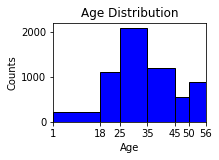

In [25]:
#Visualize user Age distribution
user_age = raw_user_data['Age']

subplot(2,2,1)
plt.hist(user_age,color = 'blue', edgecolor = 'black',bins=[1,18,25,35,45,50,56])
plt.xticks([1,18,25,35,45,50,56])
plt.xlim([1,56])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')


Text(0.5, 1.0, 'Rating Distribution')

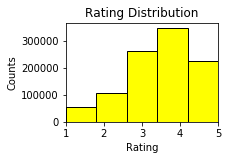

In [26]:
# Visualize overall rating by users

rating_data = raw_rating_data['Rating']
subplot(2,2,2)
plt.hist(rating_data,color = 'yellow', edgecolor = 'black',bins=5)
plt.xticks([1,2,3,4,5])
plt.xlim([1,5])
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Rating Distribution')

   MovieID             Title                       Genres  UserID  Rating  \
0        1  Toy Story (1995)  Animation|Children's|Comedy     1.0     5.0   
1        1  Toy Story (1995)  Animation|Children's|Comedy     6.0     4.0   
2        1  Toy Story (1995)  Animation|Children's|Comedy     8.0     4.0   
3        1  Toy Story (1995)  Animation|Children's|Comedy     9.0     5.0   
4        1  Toy Story (1995)  Animation|Children's|Comedy    10.0     5.0   

     Timestamp  
0  978824268.0  
1  978237008.0  
2  978233496.0  
3  978225952.0  
4  978226474.0  


Text(0.5, 1.0, 'Toy Story (1995) Rating Distribution')

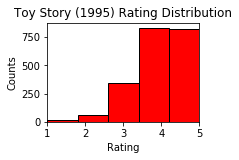

In [27]:
# Find and visualize the user rating of the movie “Toy Story”

toy_story_rating_data = movie_rating_data.query('Title=="Toy Story (1995)"')
print(toy_story_rating_data.head())
subplot(2,2,3)
plt.hist(toy_story_rating_data['Rating'],color = 'red', edgecolor = 'black',bins=5)
plt.xticks([1,2,3,4,5])
plt.xlim([1,5])
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Toy Story (1995) Rating Distribution')

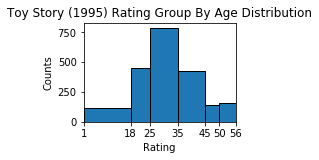

In [28]:
# Find and visualize the viewership of the movie “Toy Story” by age group
toy_st_movie_rating_user_grp_data = movie_rating_user_data.query('Title=="Toy Story (1995)"')
#print("************ toy_st_movie_rating_user_grp_data ************")


subplot(2,2,4)
#toy_st_movie_rating_user_grp_data.columns.droplevel(level=0)
#toy_st_movie_rating_user_grp_data.rename(columns = ['Age','Count'],inplace=True)
#print(toy_st_movie_rating_user_grp_data)
plt.hist(toy_st_movie_rating_user_grp_data['Age'], edgecolor = 'black',bins=[1,18,25,35,45,50,56])
plt.xticks([1,18,25,35,45,50,56])
plt.xlim([1,56])
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Toy Story (1995) Rating Group By Age Distribution')

plt.show()


******* top_25_movie_data *************
                                               Title  Rating  count
0                             $1,000,000 Duck (1971)     5.0      4
1                               'Night Mother (1986)     5.0     13
2                          'Til There Was You (1997)     5.0      2
3                                 'burbs, The (1989)     5.0     23
4                      ...And Justice for All (1979)     5.0     38
5                  10 Things I Hate About You (1999)     5.0     84
6                              101 Dalmatians (1961)     5.0     98
7                              101 Dalmatians (1996)     5.0     30
8                                12 Angry Men (1957)     5.0    295
9                           13th Warrior, The (1999)     5.0     73
10                                        187 (1997)     5.0      3
11                       2 Days in the Valley (1996)     5.0     18
12                                   20 Dates (1998)     5.0      8
13      

Text(0.5, 1.0, 'The top 25 movies by viewership rating')

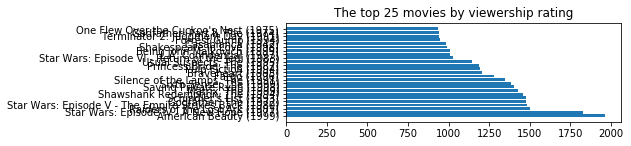

In [29]:
# Find and visualize the top 25 movies by viewership rating
subplot(2,1,1)
#top_25_movie_data = movie_rating_data.query('Rating==5').groupby(["Title","Rating"]).agg({"Rating": "count"})
top_25_movie_data = movie_rating_data.query('Rating==5').groupby(["Title","Rating"]).size().reset_index(name='count')
print("******* top_25_movie_data *************")
print(top_25_movie_data)
top_25_movie = pd.DataFrame(top_25_movie_data.sort_values(by=['count'], ascending=False).head(25))
print(top_25_movie)
#y=top_25_movie['Title']
#x=top_25_movie['Rating']

plt.barh(top_25_movie['Title'],top_25_movie['count'])
plt.title('The top 25 movies by viewership rating')

        MovieID                                           Title  \
95267       350                              Client, The (1994)   
200572      800                                Lone Star (1996)   
270398     1092                           Basic Instinct (1992)   
274632     1097               E.T. the Extra-Terrestrial (1982)   
349405     1258                             Shining, The (1980)   
360454     1270                       Back to the Future (1985)   
448383     1589                                 Cop Land (1997)   
457283     1617                        L.A. Confidential (1997)   
459925     1625                                Game, The (1997)   
464564     1644          I Know What You Did Last Summer (1997)   
465160     1645                    Devil's Advocate, The (1997)   
480755     1711  Midnight in the Garden of Good and Evil (1997)   
493339     1783                                 Palmetto (1998)   
497035     1805                              Wild Things (1998

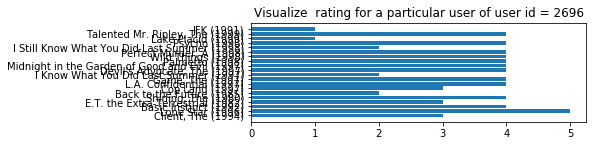

In [30]:
# •	Find the rating for a particular user of user id = 2696
subplot(2,1,2)
rating_by_2696 = movie_rating_data.query('UserID==2696')
print(rating_by_2696)

plt.barh(rating_by_2696['Title'],rating_by_2696['Rating'])
plt.title('Visualize  rating for a particular user of user id = 2696')

plt.show()

In [31]:
#	Perform machine learning on first 500 extracted records
ml_movie_data = movie_rating_user_data.head(500)
ml_movie_data = ml_movie_data.drop('Title', axis=1).drop('Genres', axis=1).drop('Timestamp', axis=1).drop('Gender',axis=1).drop('Zip-code',axis=1).drop('UserID',axis=1)
print("****ML movie data 500 *******")
print(ml_movie_data)

X = ml_movie_data.drop('Rating',axis = 1)
Y = ml_movie_data[['Rating']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

regression_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

ml_score = regression_model.score(X_test, y_test)
print("The score for our model is {}".format(ml_score))

y_predict = regression_model.predict(X_test)



print("***** Actual*****")
print(y_test)
print("**** Predicted *****")
print(y_predict)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict))) 

****ML movie data 500 *******
     MovieID  Rating   Age  Occupation
0          1     5.0   1.0        10.0
1         48     5.0   1.0        10.0
2        150     5.0   1.0        10.0
3        260     4.0   1.0        10.0
4        527     5.0   1.0        10.0
5        531     4.0   1.0        10.0
6        588     4.0   1.0        10.0
7        594     4.0   1.0        10.0
8        595     5.0   1.0        10.0
9        608     4.0   1.0        10.0
10       661     3.0   1.0        10.0
11       720     3.0   1.0        10.0
12       745     3.0   1.0        10.0
13       783     4.0   1.0        10.0
14       914     3.0   1.0        10.0
15       919     4.0   1.0        10.0
16       938     4.0   1.0        10.0
17      1022     5.0   1.0        10.0
18      1028     5.0   1.0        10.0
19      1029     5.0   1.0        10.0
20      1035     5.0   1.0        10.0
21      1097     4.0   1.0        10.0
22      1193     5.0   1.0        10.0
23      1197     3.0   1.0        

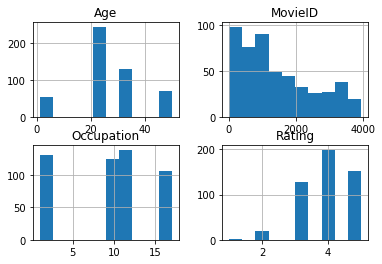

In [32]:
# •	Create a histogram for movie, age, and occupation
ml_movie_data.hist()
plt.show()
